In [ ]:
# Homework 2 Part 1 (due 7/07/2024)
# worked with Paul Chirkov and Daniel Duan

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


age reduced f_statistic: 16.101374010745634
sex reduced f_statistic: 0.8174234902529733
bmi reduced f_statistic: 230.6537644941266
bp reduced f_statistic: 106.52013085528462
s1 reduced f_statistic: 20.710567446320177
s2 reduced f_statistic: 13.746079173190743
s3 reduced f_statistic: 81.23965867875593
s4 reduced f_statistic: 100.0692644133523
s5 reduced f_statistic: 207.2711936170756
s6 reduced f_statistic: 75.39968319740322
  Variable        R2           RSS          MSE        RSE  t-statistic  \
0      age  0.035302  2.528482e+06  5720.547017  75.805999     4.012652   
1      sex  0.001854  2.616149e+06  5918.888900  77.108968     0.904115   
2      bmi  0.343924  1.719582e+06  3890.456585  62.515122    15.187290   
3       bp  0.194906  2.110158e+06  4774.113902  69.251819    10.320859   
4       s1  0.044954  2.503186e+06  5663.315624  75.425844     4.550886   
5       s2  0.030295  2.541607e+06  5750.241103  76.002491     3.707571   
6       s3  0.155859  2.212502e+06  5005.661621

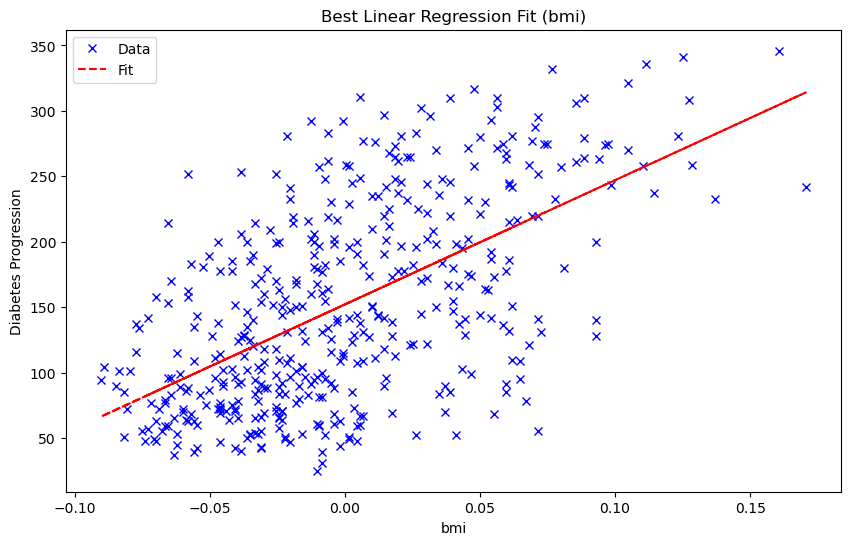

Multivariate R2 0.5177484222203498
F-statistic: 46.2724395852432
p-value for F-statistic: 1.1102230246251565e-16
RSS: 1263985.7856333437
MSE: 2859.6963475867506
RSE: 54.15423932805569


In [4]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

best_r2 = -np.inf
best_var_name = None
best_model = None
best_yHat = None

results = []

for var_name in var_names:
    # select data associated with the variable
    x_data = X[var_name]

    # turn that dataframe column into a nx1 numpy array
    x_data = np.array([x_data.to_numpy()]).reshape(-1, 1)

    # fit model
    model.fit(x_data, y.to_numpy())

    # get model predictions for each x value
    yHat = model.predict(x_data)

    # get residuals
    resid = y - yHat

    # get R2 value
    R2 = model.score(x_data, y)

    # Calculate t-statistics for the model parameters
    n = len(y)
    p = 1  # number of predictors
    SE = np.sqrt(np.sum(resid**2) / (n - p - 1)) / np.sqrt(np.sum((x_data - np.mean(x_data))**2))
    t_stat = model.coef_[0] / SE
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n - p - 1))

    # Calculate RSS, MSE, and RSE
    RSS = np.sum(resid**2)
    MSE = RSS / n
    RSE = np.sqrt(RSS / (n - p - 1))

    results.append((var_name, R2, RSS, MSE, RSE, t_stat, p_value))

    # Identify the best model
    if R2 > best_r2:
        best_r2 = R2
        best_var_name = var_name
        best_model = model
        best_yHat = yHat


    f_stat_reduced = (R2/p)/((1-R2)/(n-p-1))
    print(var_name, "reduced f_statistic:", f_stat_reduced)


# Print the results
results_df = pd.DataFrame(results, columns=['Variable', 'R2', 'RSS', 'MSE', 'RSE', 't-statistic', 'p-value'])
print(results_df)

# Plot the results for the best model
x_best = X[best_var_name]
plt.figure(figsize=(10, 6))
plt.plot(x_best, y, marker='x', lw=0, color='blue', label='Data')
plt.plot(x_best, best_yHat, ls='--', color='red', label='Fit')
plt.xlabel(best_var_name)
plt.ylabel('Diabetes Progression')
plt.title(f'Best Linear Regression Fit ({best_var_name})')
plt.legend()
plt.show()

# Step 3: Fit a multivariate linear model

# Fit model using all independent variables
model.fit(X, y)

# Get model predictions for each x value
yHat_all = model.predict(X)

# Get residuals
resid_all = y - yHat_all

# Get R2 value
R2_all = model.score(X, y)
print('Multivariate R2', R2_all)

# Calculate RSS, MSE, and RSE
RSS_all = np.sum(resid_all**2)
MSE_all = RSS_all / n
RSE_all = np.sqrt(RSS_all / (n - len(var_names) - 1))

# Calculate F-statistic
p_all = len(var_names)  # number of predictors
F_stat = (R2_all / p_all) / ((1 - R2_all) / (n - p_all - 1))
p_value_F = 1 - stats.f.cdf(F_stat, p_all, n - p_all - 1)

print(f'F-statistic: {F_stat}')
print(f'p-value for F-statistic: {p_value_F}')
print(f'RSS: {RSS_all}')
print(f'MSE: {MSE_all}')
print(f'RSE: {RSE_all}')


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Step 2: Fit linear models for each independent variable on the training set

var_names = X.columns
results = []

for var_name in var_names:
    # Select training and test data for the variable
    x_train = X_train[var_name].values.reshape(-1, 1)
    x_test = X_test[var_name].values.reshape(-1, 1)

    # Fit model on training data
    model.fit(x_train, y_train)

    # Predictions on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R2 on training and test data
    R2_train = model.score(x_train, y_train)
    R2_test = model.score(x_test, y_test)

    # Calculate residuals
    resid_train = y_train - y_train_pred
    resid_test = y_test - y_test_pred

    # Calculate RSS, MSE, and RSE for training data
    RSS_train = np.sum(resid_train**2)
    MSE_train = RSS_train / len(y_train)
    RSE_train = np.sqrt(RSS_train / (len(y_train) - 2))

    # Calculate RSS, MSE, and RSE for test data
    RSS_test = np.sum(resid_test**2)
    MSE_test = RSS_test / len(y_test)
    RSE_test = np.sqrt(RSS_test / (len(y_test) - 2))

    # Calculate t-statistics for the model parameters on training data
    SE = np.sqrt(RSS_train / (len(y_train) - 2)) / np.sqrt(np.sum((x_train - np.mean(x_train))**2))
    t_stat = model.coef_[0] / SE
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=len(y_train) - 2))

    results.append((var_name, R2_train, R2_test, RSS_train, MSE_train, RSE_train, RSS_test, MSE_test, RSE_test, t_stat, p_value))

# Print the results
results_df = pd.DataFrame(results, columns=['Variable', 'R2_train', 'R2_test', 'RSS_train', 'MSE_train', 'RSE_train', 'RSS_test', 'MSE_test', 'RSE_test', 't-statistic', 'p-value'])
print(results_df)

# Step 3: Fit a multivariate linear model on the training set

# Fit model using all independent variables
model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_all = model.predict(X_train)
y_test_pred_all = model.predict(X_test)

# Calculate R2 on training and test data
R2_train_all = model.score(X_train, y_train)
R2_test_all = model.score(X_test, y_test)
print('Multivariate R2 (Train):', R2_train_all)
print('Multivariate R2 (Test):', R2_test_all)

# Calculate residuals
resid_train_all = y_train - y_train_pred_all
resid_test_all = y_test - y_test_pred_all

# Calculate RSS, MSE, and RSE for training data
RSS_train_all = np.sum(resid_train_all**2)
MSE_train_all = RSS_train_all / len(y_train)
RSE_train_all = np.sqrt(RSS_train_all / (len(y_train) - len(var_names) - 1))

# Calculate RSS, MSE, and RSE for test data
RSS_test_all = np.sum(resid_test_all**2)
MSE_test_all = RSS_test_all / len(y_test)
RSE_test_all = np.sqrt(RSS_test_all / (len(y_test) - len(var_names) - 1))

# Calculate F-statistic for training data
p_all = len(var_names)  # number of predictors
F_stat_all = (R2_train_all / p_all) / ((1 - R2_train_all) / (len(y_train) - p_all - 1))
p_value_F_all = 1 - stats.f.cdf(F_stat_all, p_all, len(y_train) - p_all - 1)

print(f'F-statistic: {F_stat_all}')
print(f'p-value for F-statistic: {p_value_F_all}')
print(f'RSS (Train): {RSS_train_all}')
print(f'MSE (Train): {MSE_train_all}')
print(f'RSE (Train): {RSE_train_all}')
print(f'RSS (Test): {RSS_test_all}')
print(f'MSE (Test): {MSE_test_all}')
print(f'RSE (Test): {RSE_test_all}')




  Variable  R2_train   R2_test     RSS_train    MSE_train  RSE_train  \
0      age  0.038616  0.008290  2.062138e+06  5841.751499  76.648795   
1      sex  0.000051 -0.009028  2.144860e+06  6076.090305  78.171043   
2      bmi  0.365724  0.233350  1.360502e+06  3854.112652  62.258119   
3       bp  0.197821  0.173412  1.720649e+06  4874.360692  70.015247   
4       s1  0.039819  0.055568  2.059558e+06  5834.441404  76.600823   
5       s2  0.024001  0.044948  2.093488e+06  5930.559798  77.229218   
6       s3  0.147456  0.185122  1.828681e+06  5180.398942  72.179754   
7       s4  0.180705  0.196660  1.757362e+06  4978.362469  70.758245   
8       s5  0.304906  0.382692  1.490954e+06  4223.666690  65.174636   
9       s6  0.152383  0.110037  1.818111e+06  5150.456018  71.970851   

        RSS_test     MSE_test   RSE_test  t-statistic       p-value  
0  467626.645885  5254.231976  73.314521     3.754820  2.029829e-04  
1  475792.321885  5345.981145  73.951858     0.133325  8.940129e-01

/opt/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

# ANSWER TO Q4: The 3 variables with the highest reduced f-statistics are bmi, s5, and blood pressure (230, 207, 106, respectively). These variables also have the highest R2 values. This makes sense because the reduced f statistic and R2 are representative of having data with variables that have a high degree of correlation.